In [1]:
!pip install rasterio

In [2]:
import os
import rasterio
from rasterio.merge import merge
from rasterio.enums import Resampling
from tqdm import tqdm
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
# Define function to list TIF files in a folder
def list_tif_files(folder_path):
    return [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.tif')]

# Define function to read datasets
def read_datasets(file_list):
    datasets = []
    for file in tqdm(file_list, desc="Reading TIF files"):
        src = rasterio.open(file)
        datasets.append(src)
    return datasets

# Merge datasets into orthomosaic
def create_orthomosaic(datasets, resampling_method, blending_method, output_path):
    # Perform the merge
    print(f"Merging with resampling: {resampling_method.name}, blending: {blending_method}")
    mosaic, out_transform = merge(
        datasets,
        method=blending_method,
        resampling=resampling_method
    )

    # Use metadata from the first file as a template
    out_meta = datasets[0].meta.copy()
    
    # Update metadata for the mosaic
    out_meta.update({
        "driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": out_transform
    })

    # Write the mosaic to disk
    with rasterio.open(output_path, "w", **out_meta) as dest:
        dest.write(mosaic)


In [4]:
def visualize_results(resampling_methods, blending_options, output_path):
    print("Visualizing results...")
    nrows = len(resampling_methods)
    ncols = len(blending_options)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 10))

    for i, resampling_method in enumerate(resampling_methods):
        for j, blending_option in enumerate(blending_options):
            filename = f"output_{resampling_method.name}_{blending_option}.tif"
            print(filename)
            file_path = os.path.join(output_path, filename)

            if os.path.exists(file_path):
                with rasterio.open(file_path) as src:
                    ax = axes[i,j]
                    show(src, ax=ax, title=f"{resampling_method.name} - {blending_option}")
            else:
                print(f"File not found: {file_path}")
                axes[j].text(0.5, 0.5, 'File not found', ha='center', va='center', fontsize=12)
                axes[j].set_title(f"{resampling_method.name} - {blending_option}")
                axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [5]:
folder_path = "/home/jovyan/STDS/orthophotos"  
output_path = "/home/jovyan/STDS/output"  

# Define the resampling methods and blending options you want to try
resampling_methods = [Resampling.nearest, Resampling.bilinear, Resampling.cubic]
blending_options = ['first', 'last', 'min', 'max', 'sum', 'count']

# List all TIF files in the folder
tif_files = list_tif_files(folder_path)

# Read datasets
datasets = read_datasets(tif_files)

# Loop through different resampling and blending options
for resampling_method in resampling_methods:
    for blending_method in blending_options:
        # Construct unique output file name for each combination
        output_file = f"output_{resampling_method.name}_{blending_method}.tif"
        output_file_path = os.path.join(output_path, output_file)

        # Create orthomosaic
        create_orthomosaic(datasets, resampling_method, blending_method, output_file_path)
        print(f"Saved: {output_file_path}")

# Close all datasets
for dataset in datasets:
    dataset.close()

print("All orthomosaics created.")

Reading TIF files: 100%|██████████| 641/641 [00:23<00:00, 26.76it/s] 


Merging with resampling: nearest, blending: first
Saved: /home/jovyan/STDS/output/output_nearest_first.tif
Merging with resampling: nearest, blending: last
Saved: /home/jovyan/STDS/output/output_nearest_last.tif
Merging with resampling: nearest, blending: min
Saved: /home/jovyan/STDS/output/output_nearest_min.tif
Merging with resampling: nearest, blending: max
Saved: /home/jovyan/STDS/output/output_nearest_max.tif
Merging with resampling: nearest, blending: sum
Saved: /home/jovyan/STDS/output/output_nearest_sum.tif
Merging with resampling: nearest, blending: count
Saved: /home/jovyan/STDS/output/output_nearest_count.tif
Merging with resampling: bilinear, blending: first
Saved: /home/jovyan/STDS/output/output_bilinear_first.tif
Merging with resampling: bilinear, blending: last
Saved: /home/jovyan/STDS/output/output_bilinear_last.tif
Merging with resampling: bilinear, blending: min
Saved: /home/jovyan/STDS/output/output_bilinear_min.tif
Merging with resampling: bilinear, blending: max
Sa

In [8]:
resampling_methods = [Resampling.nearest, Resampling.bilinear, Resampling.cubic]
blending_options = ['first', 'last', 'min', 'max', 'sum', 'count']

Visualizing results...
output_nearest_first.tif
output_nearest_last.tif
output_nearest_min.tif
output_nearest_max.tif
output_nearest_sum.tif
output_nearest_count.tif
output_bilinear_first.tif
output_bilinear_last.tif
output_bilinear_min.tif
output_bilinear_max.tif
output_bilinear_sum.tif
output_bilinear_count.tif
output_cubic_first.tif
output_cubic_last.tif
output_cubic_min.tif
output_cubic_max.tif
output_cubic_sum.tif
output_cubic_count.tif


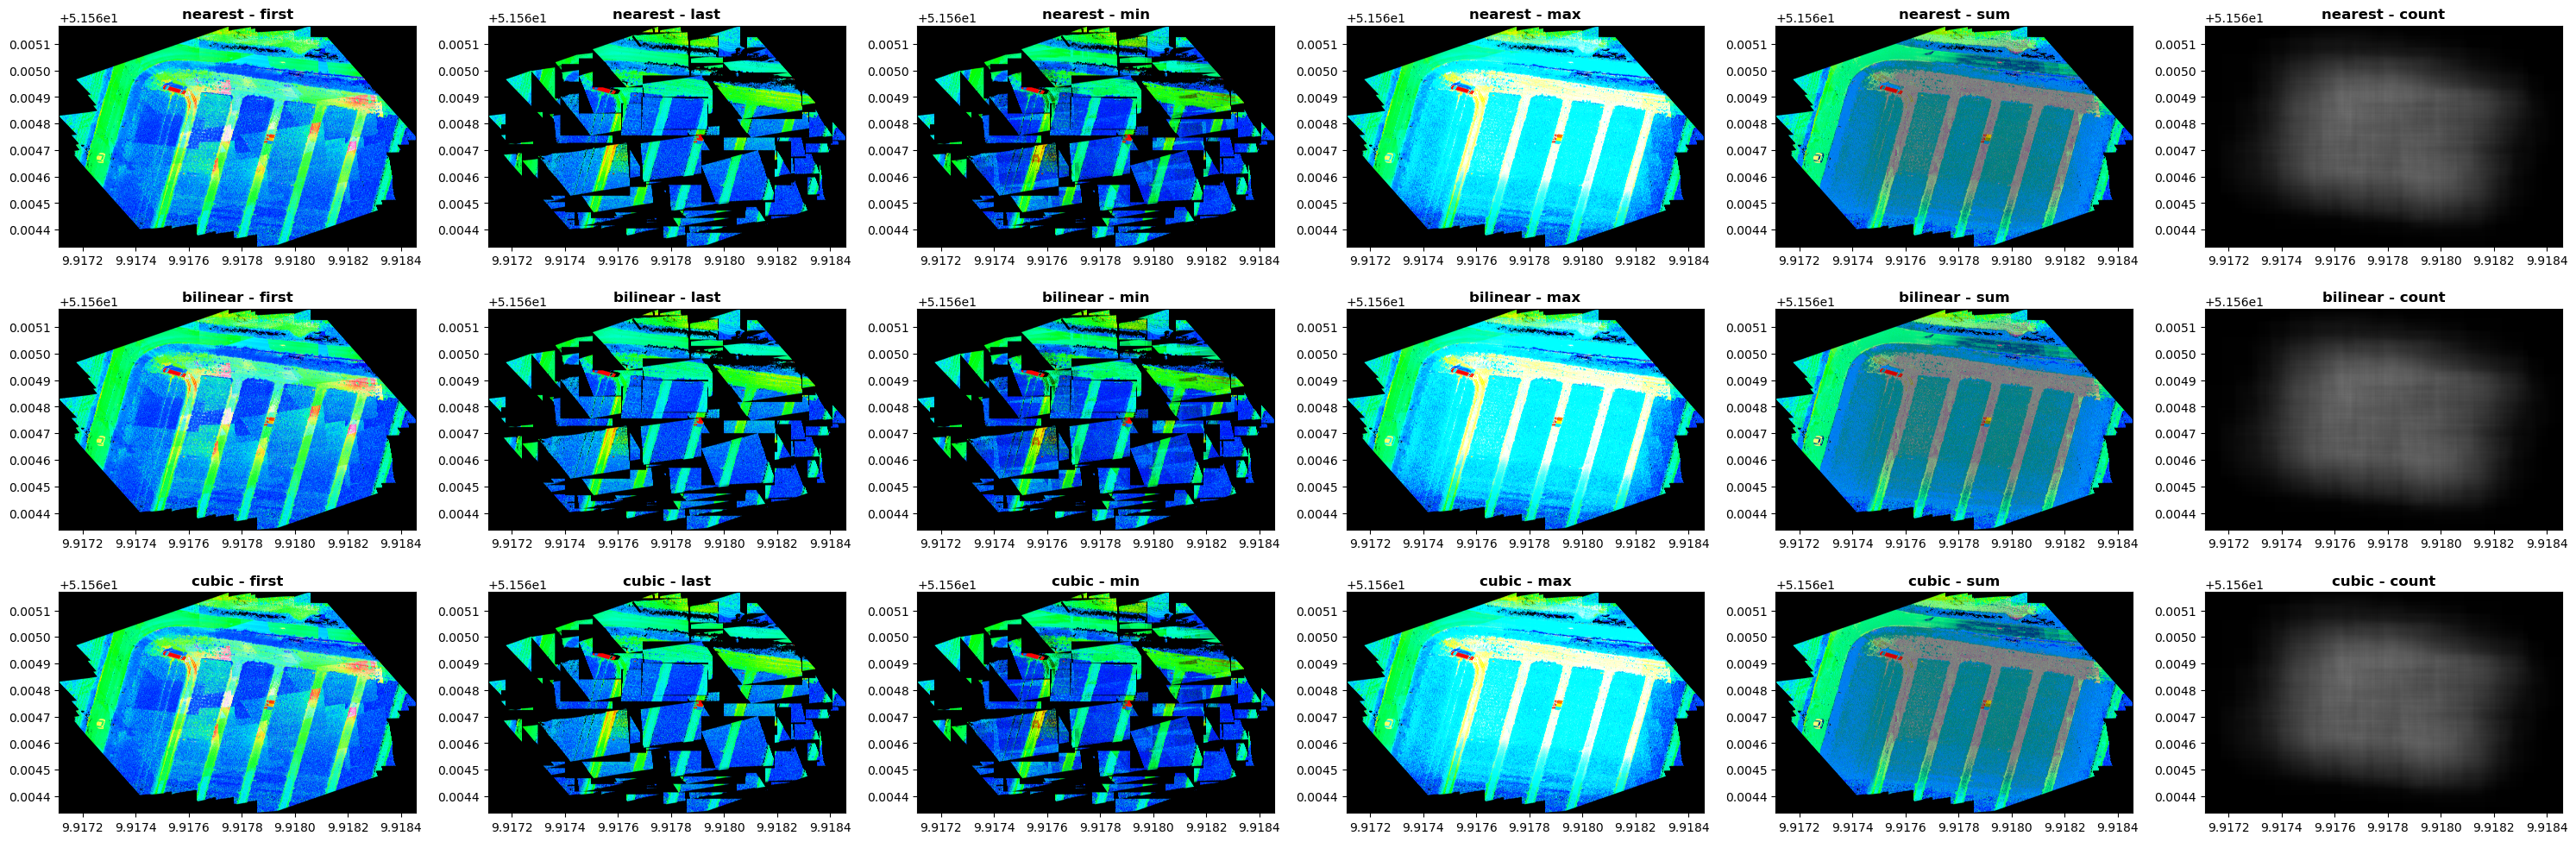

In [9]:
visualize_results(resampling_methods, blending_options, output_path)